# 1. Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_house = pd.read_csv("Dataset/AmesHousing.csv")
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

### Identifying Missing Values

In [3]:
df_house.isna().sum().sort_values(ascending=False)

Pool QC         2917
Misc Feature    2824
Alley           2732
Fence           2358
Mas Vnr Type    1775
                ... 
PID                0
Central Air        0
1st Flr SF         0
2nd Flr SF         0
SalePrice          0
Length: 82, dtype: int64

### Store the Counts of Missing Values in a Serie

In [4]:
na_series = df_house.isna().sum()
na_series

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

### Threshold Value for Missing Values

In [5]:
data_len = len(df_house) * 0.05
data_len

146.5

### Select Columns with Missing Values Below the Threshold

In [6]:
na_series[(na_series < data_len) & (na_series != 0)]

Mas Vnr Area      23
Bsmt Qual         80
Bsmt Cond         80
Bsmt Exposure     83
BsmtFin Type 1    80
BsmtFin SF 1       1
BsmtFin Type 2    81
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Electrical         1
Bsmt Full Bath     2
Bsmt Half Bath     2
Garage Cars        1
Garage Area        1
dtype: int64

### Drop Data with a lot of Missing Values

In [7]:
col_names_to_drop = list(na_series[na_series > data_len].keys())
df_house.drop(columns=col_names_to_drop, inplace= True)
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 70 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Lot Shape        2930 non-null   object 
 7   Land Contour     2930 non-null   object 
 8   Utilities        2930 non-null   object 
 9   Lot Config       2930 non-null   object 
 10  Land Slope       2930 non-null   object 
 11  Neighborhood     2930 non-null   object 
 12  Condition 1      2930 non-null   object 
 13  Condition 2      2930 non-null   object 
 14  Bldg Type        2930 non-null   object 
 15  House Style      2930 non-null   object 
 16  Overall Qual     2930 non-null   int64  
 17  Overall Cond  

### Separate the Target Variable

In [8]:
y = df_house["SalePrice"].values.reshape(-1,1)
df_house.drop("SalePrice", axis=1, inplace=True)

### Separate Categorical and Numerical Columns

In [9]:
object_cols = list(df_house.select_dtypes(include="object").columns)
numerical_cols = list(df_house.select_dtypes(exclude="object").columns)
print(f"Object Columns:\n {object_cols}\n    \nNumerical Columns:\n {numerical_cols}")

Object Columns:
 ['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Paved Drive', 'Sale Type', 'Sale Condition']
    
Numerical Columns:
 ['Order', 'PID', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen 

### Splitting the Data Into Training and Test Sets

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_house, y, test_size=0.2, random_state=42
)

### Impute (fill) the Data

In [11]:
from sklearn.impute import SimpleImputer

# For Categorical
imp_cat = SimpleImputer(strategy="most_frequent")
X_train_cat = imp_cat.fit_transform(X_train[object_cols])
X_test_cat = imp_cat.transform(X_test[object_cols])

# For Numerical
imp_num = SimpleImputer(strategy="mean")
X_train_num = imp_num.fit_transform(X_train[numerical_cols])
X_test_num = imp_num.transform(X_test[numerical_cols])

### Convert Categorical Data to Numerical

In [12]:
X_train_encoded = pd.get_dummies(
    pd.DataFrame(X_train_cat, columns=object_cols), 
    drop_first=True
)
X_test_encoded = pd.get_dummies(
    pd.DataFrame(X_test_cat, columns=object_cols), 
    drop_first=True
)

### Transform the Training and Test Sets for Categorical Variables into the Same Structure

In [13]:
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

### Scaling Numerical Datas

In [14]:
from sklearn.preprocessing import StandardScaler

# For X
scaler_X = StandardScaler()
X_train_num_scaled = scaler_X.fit_transform(X_train_num)
X_test_num_scaled = scaler_X.transform(X_test_num)

# For y
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

### Combine the Train Sets and Tests Separately

In [15]:
# For Train Set
X_train_final = np.concatenate(
    [X_train_num_scaled.astype(np.float32), X_train_encoded.astype(np.float32)], 
    axis=1
)

# For Test Set
X_test_final = np.concatenate(
    [X_test_num_scaled.astype(np.float32), X_test_encoded.astype(np.float32)], 
    axis=1
)

In [16]:
X_train_final.shape, X_test_final.shape

((2344, 225), (586, 225))

# 2. ANN Model for Predicting SalePrice

In [17]:
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Building the ANN Model

In [18]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=128, activation="relu", input_shape=(X_train_final.shape[1],)))
ann.add(tf.keras.layers.Dropout(0.2))
ann.add(tf.keras.layers.Dense(units=64,activation="relu"))
ann.add(tf.keras.layers.Dense(units=32,activation="relu"))
ann.add(tf.keras.layers.Dense(units=1))

### Compiling the ANN

In [19]:
from tensorflow.keras.optimizers import Adam
ann.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="mse",
    metrics=["mae"]
)

### Training the ANN

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", patience=25)
history = ann.fit(
    X_train_final,
    y_train_scaled,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/100
59/59 [==============================] - 2s 10ms/step - loss: 0.3370 - mae: 0.3884 - val_loss: 0.1110 - val_mae: 0.2433
Epoch 2/100
59/59 [==============================] - 0s 7ms/step - loss: 0.1958 - mae: 0.2605 - val_loss: 0.0963 - val_mae: 0.2248
Epoch 3/100
59/59 [==============================] - 1s 9ms/step - loss: 0.1476 - mae: 0.2404 - val_loss: 0.0883 - val_mae: 0.2117
Epoch 4/100
59/59 [==============================] - 0s 8ms/step - loss: 0.0970 - mae: 0.2127 - val_loss: 0.0762 - val_mae: 0.1901
Epoch 5/100
59/59 [==============================] - 0s 8ms/step - loss: 0.1100 - mae: 0.2062 - val_loss: 0.0806 - val_mae: 0.1964
Epoch 6/100
59/59 [==============================] - 1s 9ms/step - loss: 0.0940 - mae: 0.2019 - val_loss: 0.0975 - val_mae: 0.2108
Epoch 7/100
59/59 [==============================] - 0s 7ms/step - loss: 0.0813 - mae: 0.1926 - val_loss: 0.0824 - val_mae: 0.1968
Epoch 8/100
59/59 [==============================] - 0s 5ms/step - loss: 0.0705 - 

### Evaluating the ANN on the Test Set

In [21]:
test_loss, test_mae = ann.evaluate(X_test_final, y_test_scaled)
print(f"\nTest MAE (Scaled): {test_mae:.4f}")
print(f"Test MAE (Original Scale): {test_mae * scaler_y.scale_[0]:.2f} USD")

19/19 [==============================] - 0s 3ms/step - loss: 0.1099 - mae: 0.2025

Test MAE (Scaled): 0.2025
Test MAE (Original Scale): 15616.84 USD


### Making a Prediction on a Single Observation

In [22]:
def predict_single_observation(model, scaler_X, scaler_y, original_data, index=0):
    # Select specific observation
    single_obs = original_data.iloc[[index]] 
    
    # Separate categorical and numerical features
    single_cat = single_obs[object_cols]
    single_num = single_obs[numerical_cols]
    
    # Impute missing values
    single_cat_imp = imp_cat.transform(single_cat)
    single_num_imp = imp_num.transform(single_num)
    
    # One-hot encode categorical features
    single_encoded = pd.get_dummies(
        pd.DataFrame(single_cat_imp, columns=object_cols)
    ).reindex(columns=X_train_encoded.columns, fill_value=0)
    single_encoded = single_encoded.astype(np.float64)
    
    # Scale numerical features
    single_num_scaled = scaler_X.transform(single_num_imp)
    
    # Combine features
    single_final = np.concatenate([single_num_scaled, single_encoded], axis=1).astype(np.float64)
    
    # Make prediction and inverse scaling
    pred_scaled = model.predict(single_final)
    pred = scaler_y.inverse_transform(pred_scaled)
    
    # Get actual value
    real_price = scaler_y.inverse_transform(y_test_scaled[index].reshape(1, -1))
    
    print(f"Predicted Price: {pred[0][0]:.2f} USD")
    print(f"Actual Price: {real_price[0][0]:.2f} USD")
    print(f"Error: {abs(pred[0][0] - real_price[0][0]):.2f} USD")

# Example usage
predict_single_observation(ann, scaler_X, scaler_y, X_test, index=10)

1/1 [==============================] - 0s 118ms/step
Predicted Price: 216664.41 USD
Actual Price: 235000.00 USD
Error: 18335.59 USD


### Predicting the Results of the Test Set

In [23]:
# 1. Make predictions on the test set (X_test_final should be used)
y_pred_scaled = ann.predict(X_test_final)

# 2. Convert predictions and actual values back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# 3. Display side by side
np.set_printoptions(precision=2, suppress=True)  
comparison = np.concatenate((y_pred.reshape(-1,1), y_test_original.reshape(-1,1)), axis=1)

print("\nPredictions vs Actual Values (USD):")
print(comparison[:23])  # Display the first 23 samples


19/19 [==============================] - 0s 4ms/step

Predictions vs Actual Values (USD):
[[142329.89 161000.  ]
 [114256.12 116000.  ]
 [193788.81 196500.  ]
 [129692.11 123600.  ]
 [127177.04 126000.  ]
 [185790.72 174190.  ]
 [154774.17 200000.  ]
 [146565.44 148500.  ]
 [110989.77  88750.  ]
 [379807.44 409900.  ]
 [222317.62 235000.  ]
 [255300.34 246900.  ]
 [ 83597.33  85500.  ]
 [131103.23 145000.  ]
 [120669.48  95000.  ]
 [170992.81 160500.  ]
 [141514.47 147000.  ]
 [193684.47 192500.  ]
 [120682.66 124000.  ]
 [149325.19 137500.  ]
 [196184.   198900.  ]
 [142745.16 140000.  ]
 [208838.38 200000.  ]]


### Visualizing Actual vs Predicted Prices

19/19 [==============================] - 0s 3ms/step


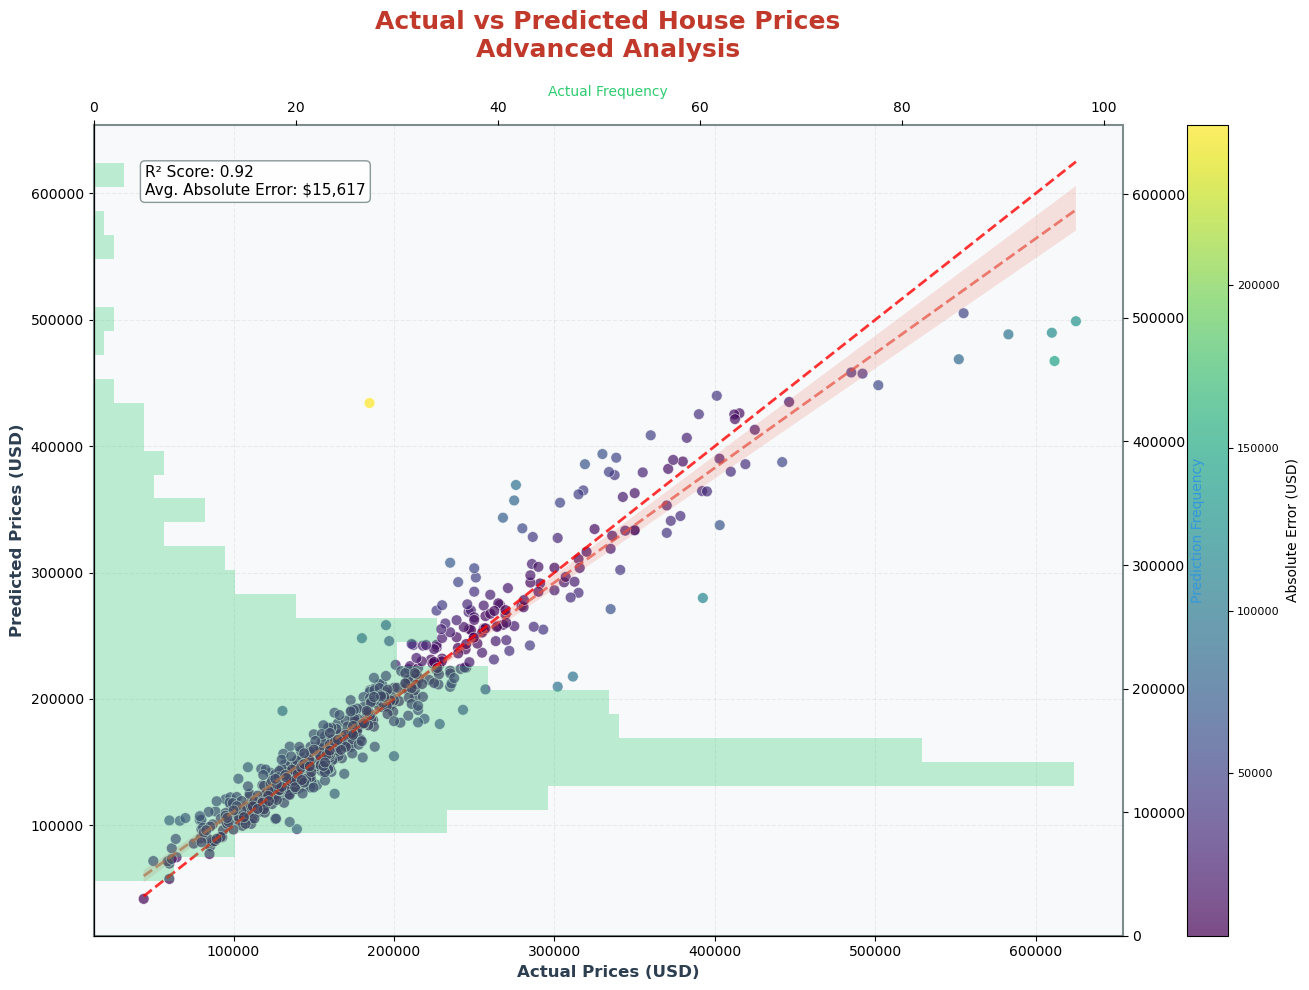

In [24]:
from sklearn.metrics import r2_score

# Prepare predictions and actual values
y_pred_scaled = ann.predict(X_test_final)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Set up visualization
plt.figure(figsize=(14, 10))
ax = plt.gca()

# Main scatter plot
scatter = plt.scatter(
    y_test_original, 
    y_pred,
    c=np.abs(y_test_original - y_pred), 
    cmap='viridis',
    alpha=0.7,
    edgecolors='w',
    linewidth=0.5,
    s=60  # Point size
)

# Perfect prediction line
plt.plot([y_test_original.min(), y_test_original.max()], 
         [y_test_original.min(), y_test_original.max()], 
         'r--', lw=2, alpha=0.8)

# Regression line
sns.regplot(
    x=y_test_original, 
    y=y_pred, 
    scatter=False, 
    color='#e74c3c',
    line_kws={'lw': 2, 'ls': '--', 'alpha': 0.7}
)

# Style elements
plt.xlabel("Actual Prices (USD)", fontsize=12, fontweight='bold', color='#2c3e50')
plt.ylabel("Predicted Prices (USD)", fontsize=12, fontweight='bold', color='#2c3e50')
plt.title("Actual vs Predicted House Prices\nAdvanced Analysis", 
         fontsize=18, pad=20, color='#c0392b', fontweight='bold')

# Color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Absolute Error (USD)', fontsize=10)
cbar.ax.tick_params(labelsize=8)

# Grid and background
plt.grid(alpha=0.2, ls='--')
ax.set_facecolor('#f8f9fa')

# Frame styles
for spine in ax.spines.values():
    spine.set_color('#7f8c8d')
    spine.set_linewidth(1.5)

# Performance metrics box
r2 = r2_score(y_test_original, y_pred)
mae = np.mean(np.abs(y_test_original - y_pred))
textstr = f'R² Score: {r2:.2f}\nAvg. Absolute Error: ${mae:,.0f}'
props = dict(boxstyle='round', facecolor='white', edgecolor='#7f8c8d', alpha=0.9)
plt.text(0.05, 0.95, textstr, 
         transform=ax.transAxes, 
         verticalalignment='top',
         fontsize=11,
         bbox=props)

# Marginal distribution plots
plt.twinx().hist(y_pred, bins=30, alpha=0.3, color='#3498db', orientation='vertical')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.ylabel('Prediction Frequency', color='#3498db')

plt.twiny().hist(y_test_original, bins=30, alpha=0.3, color='#2ecc71', orientation='horizontal')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('Actual Frequency', color='#2ecc71')

plt.tight_layout()
plt.savefig("Results/Actual_vs_Predicted.png")
plt.show()

### Error Distribution

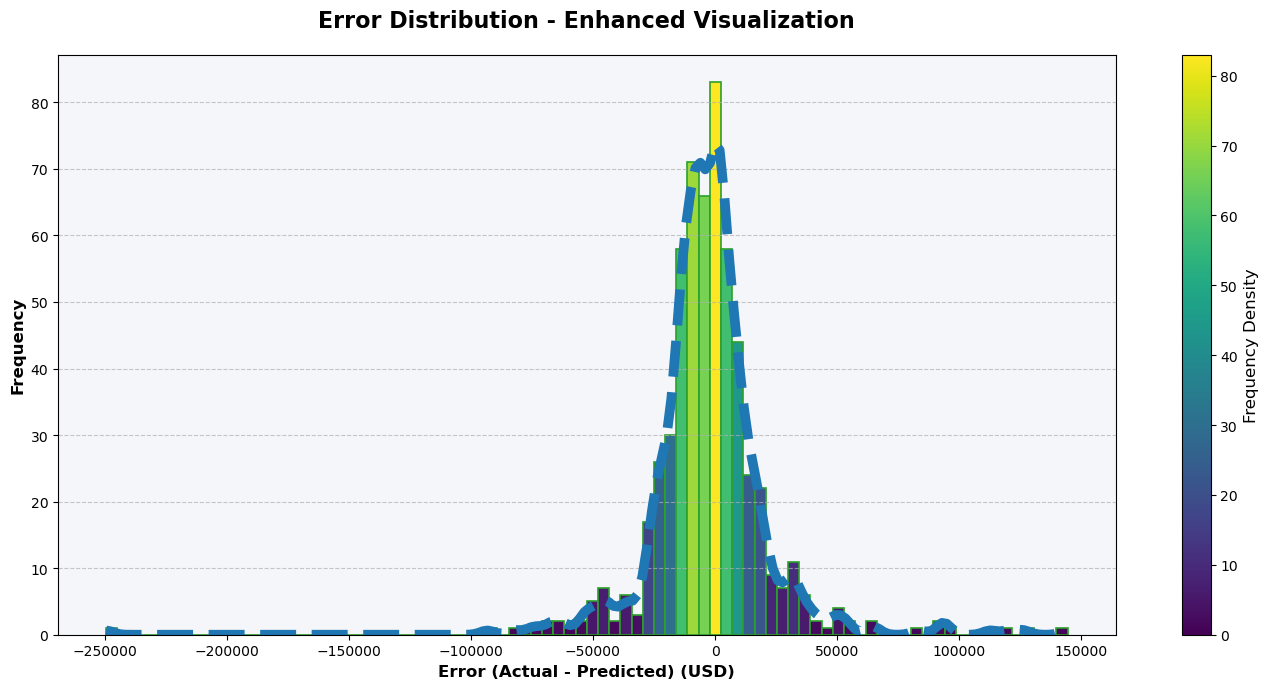

In [26]:
plt.figure(figsize=(14, 7))
residuals = y_test_original.flatten() - y_pred.flatten()
# Plot Histogram and KDE
hist = sns.histplot(
    residuals, 
    kde=True,
    bins="auto",
    color='#1f77b4',        
    edgecolor='#2ca02c',    
    linewidth=1.2,
    alpha=0.7,
    kde_kws={'bw_adjust': 0.4},
    line_kws={              
        'color': '#e84393', 
        'linewidth': 7, 
        'linestyle': '--'
    }
)

# Add gradient color effect to bars
max_height = max([p.get_height() for p in hist.patches])
for patch in hist.patches:
    normalized_height = patch.get_height() / max_height
    patch.set_facecolor(plt.cm.viridis(normalized_height))

# Style axes and title
plt.xlabel("Error (Actual - Predicted) (USD)", fontsize=12, fontweight='bold')
plt.ylabel("Frequency", fontsize=12, fontweight='bold')
plt.title("Error Distribution - Enhanced Visualization", fontsize=16, pad=20, fontweight='bold')

# Customize background and grid
plt.gca().set_facecolor('#f5f6fa')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', 
                         norm=plt.Normalize(vmin=0, vmax=max_height))
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Frequency Density', fontsize=12)

plt.tight_layout()
plt.savefig("Results/Error_Distribution.png")
plt.show()

### House Price Prediction Errors by Year

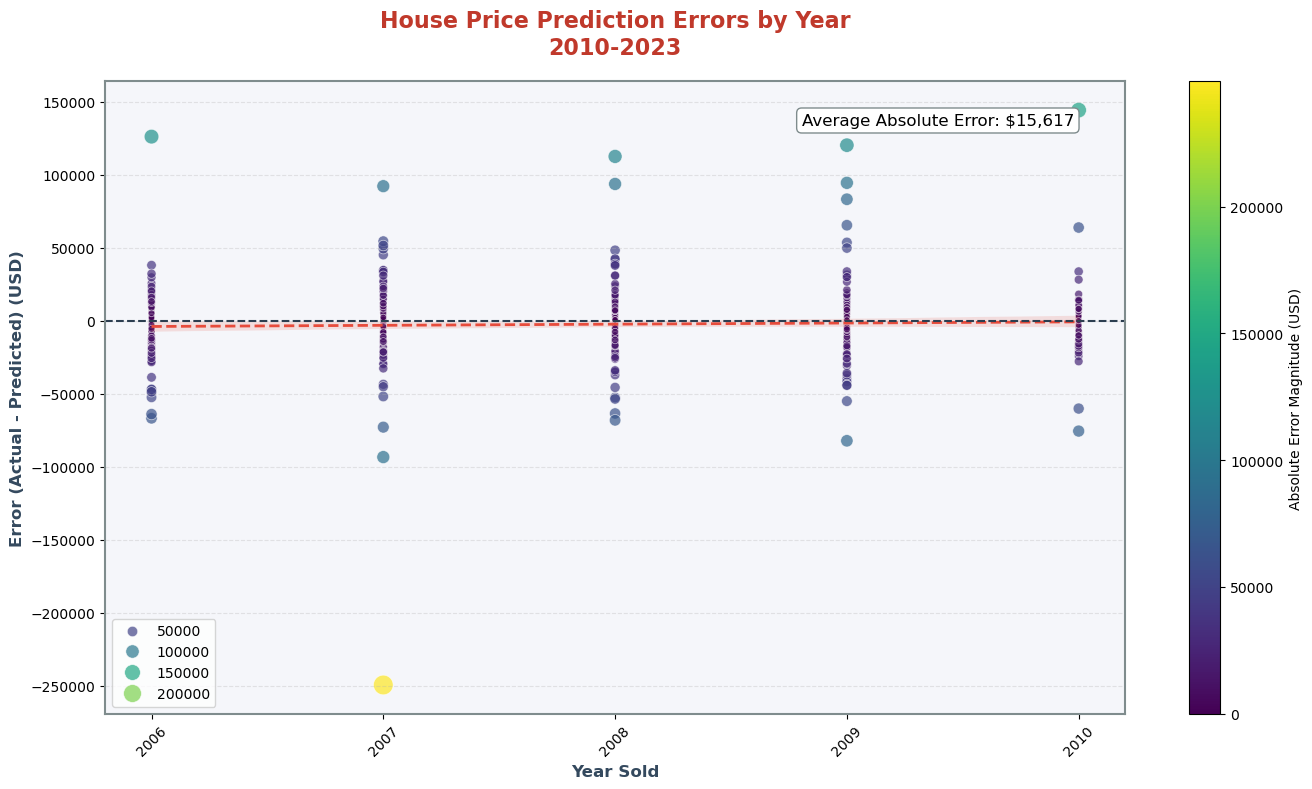

In [27]:
if 'Yr Sold' in df_house.columns:
    plt.figure(figsize=(14, 8))
    ax = plt.gca()  # Define axis object
    
    # Enhanced scatter plot
    scatter = sns.scatterplot(
        x=X_test['Yr Sold'].values.ravel(),
        y=residuals.ravel(),
        hue=np.abs(residuals.ravel()),
        palette='viridis',
        size=np.abs(residuals.ravel()),
        sizes=(20, 200),
        alpha=0.7,
        edgecolor='w',
        linewidth=0.5,
        ax=ax  # Specify axis
    )
    
    # Trend line (on the same axis)
    sns.regplot(
        x=X_test['Yr Sold'].values.ravel(),
        y=residuals.ravel(),
        scatter=False,
        color='#e74c3c',
        line_kws={'lw': 2, 'ls': '--'},
        ax=ax
    )
    
    # Style elements
    plt.axhline(0, color='#2c3e50', lw=1.5, ls='--')
    plt.xlabel("Year Sold", fontsize=12, fontweight='bold', color='#34495e')
    plt.ylabel("Error (Actual - Predicted) (USD)", fontsize=12, fontweight='bold', color='#34495e')
    plt.title("House Price Prediction Errors by Year\n2010-2023", 
             fontsize=16, pad=20, color='#c0392b', fontweight='bold')
    
    # Color bar settings
    norm = plt.Normalize(0, np.abs(residuals).max())
    sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
    sm.set_array([])  # Required for colorbar
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label('Absolute Error Magnitude (USD)', fontsize=10)
    
    # Axis customization
    plt.xticks(np.arange(X_test['Yr Sold'].min(), X_test['Yr Sold'].max()+1), 
              rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', alpha=0.3, ls='--')
    
    # Background and frame
    ax.set_facecolor('#f5f6fa')
    for spine in ax.spines.values():
        spine.set_color('#7f8c8d')
        spine.set_linewidth(1.5)
    
    # Additional annotation
    avg_error = np.mean(np.abs(residuals))
    ax.text(0.95, 0.95, 
           f"Average Absolute Error: ${avg_error:,.0f}",
           ha='right', va='top',
           transform=ax.transAxes,
           fontsize=12,
           bbox=dict(facecolor='white', edgecolor='#7f8c8d', boxstyle='round'))
    
    plt.tight_layout()
    plt.savefig("Results/House_Price_Prediction_Errors_by_year.png")
    plt.show()
